In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

import pickle

In [8]:
# Load the data from pickle file
data = pd.read_pickle('ass2.pickle')

In [9]:
# dividing into 'train', 'dev', 'test' sets
train = data['train']
dev = data['dev']
test = data['test']
X_train = train.drop('target', axis=1)
y_train = train['target']
X_dev = dev.drop('target', axis=1)
y_dev = dev['target']
X_test = test.drop('target', axis=1)
y_test = test['target']
print(f"Train set: {train.shape}")
print(f"Dev set: {dev.shape}")
print(f"Test set: {test.shape}")
print(f"number of labels: {len(np.unique(train['target']))}")
print(f"number of samples in train set: {len(train['f0'])}")
print(f"number of samples in dev set: {len(dev['f0'])}")
print(f"number of samples in test set: {len(test['f0'])}")
print(f" the first 5 samples in train set: {train.head()}")
for i in range(len(np.unique(train['target']))):
    print(f"number of samples in class in train set {i}: {len(train[train['target']==i])}")
# range per feature
feature_values = [train[f'f{i}'] for i in range(0, 42)]
for i in range(len(feature_values)):
    print(f"range of feature {i}: {np.max(feature_values[i]), np.min(feature_values[i])}")
# check if there are any Null values
for i in range(42):
    # train.isnull().sum()
    print(f"number of Nan values in feature {i}: {np.sum(np.isnan(train[f'f{i}']))}")
# check what type each feature is
for i in range(42):
    print(f"type of feature {i}: {train[f'f{i}'][0].dtype}")
# how many unique values each feature has
for i in range(42):
    print(f"number of unique values in feature {i}: {len(np.unique(train[f'f{i}']))}")
# check how many samples are there for each label in the train set
for i in range(42):
    print(f"number of samples in feature {i}: value 0: {len(train[train[f'f{i}']==0])} , value 1: {len(train[train[f'f{i}']==1])}, value 2:{len(train[train[f'f{i}']==2])}")
# check how many samples are there for each label in the all the train set from all the features together
labels = [0,0,0]
for i in range(42):
    labels[0] += len(train[train[f'f{i}']==0])
    labels[1] += len(train[train[f'f{i}']==1])
    labels[2] += len(train[train[f'f{i}']==2])
print(f"number of samples in all the train set: label 0: {labels[0]} , label 1: {labels[1]}, label 2:{labels[2]}")
# check if is there dominant label in each feature (more than 90% of the samples) and save those features
dominant_features = []
for i in range(42):
    if len(train[train[f'f{i}']==0])/len(train[f'f{i}']) > 0.90:
        dominant_features.append(i)
print(f"dominant features: {dominant_features}")
# check if there are duplicates samples in the train set
print(f"number of duplicates in train set: {len(train[train.duplicated()])}")
# check the mean and std of each feature
for i in range(42):
    print(f"mean of feature {i}: {np.mean(train[f'f{i}'])}, std of feature {i}: {np.std(train[f'f{i}'])}")

# sns.pairplot(train ,hue="target", palette='Set1');



Train set: (40533, 43)
Dev set: (13512, 43)
Test set: (13512, 43)
number of labels: 3
number of samples in train set: 40533
number of samples in dev set: 13512
number of samples in test set: 13512
 the first 5 samples in train set:        f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...  f33  f34  f35  f36  f37   
51905   1   0   0   0   0   0   2   1   2   2  ...    0    0    0    2    0  \
52612   0   0   0   0   0   0   2   1   0   0  ...    0    0    0    2    0   
61699   2   1   2   1   1   0   2   2   0   0  ...    0    0    0    1    0   
6291    0   0   0   0   0   0   0   0   0   0  ...    0    0    0    2    0   
17484   0   0   0   0   0   0   1   1   2   0  ...    0    0    0    2    1   

       f38  f39  f40  f41  target  
51905    0    0    0    0       2  
52612    0    0    0    0       2  
61699    0    0    0    0       2  
6291     0    0    0    0       2  
17484    2    0    0    0       2  

[5 rows x 43 columns]
number of samples in class in train set 0: 3917
number

Explanation of data analysis and preprocessing:
We checked that each of the sets (train, dev, test) has the same number of features and labels.
We checked the range of each feature and saw that all the features are in the same range.
We checked that all the features are the same type (int64), so we didn't need to change any type or convert any feature.
We checked that there are no null values in the data, so we didn't need to fill any values.
We checked the values for each feature and saw that there are only 3 values for each feature (0,1,2).
Also, we counted the number of samples for each feature for each value, and saw that there are no features that have only one value, and since we don't know that is the meaning of each value, we didn't remove any feature (even though there are some features that dominant in one value).
We calculated the mean and the standard deviation for each feature, we did it for checking the statistical behavior of each feature.
We checked that there are no duplicates in the data, so we didn't need to remove any duplicates.
We checked that there are no dominant features in the data, so we didn't need to remove any features.
We checked that there are no dominant labels in the data, so we didn't need to remove any labels.
We checked that there are no highly correlated features in the data, so we didn't need to remove any features.
We checked that there are no highly correlated features with the target in the data, so we didn't need to remove any features.

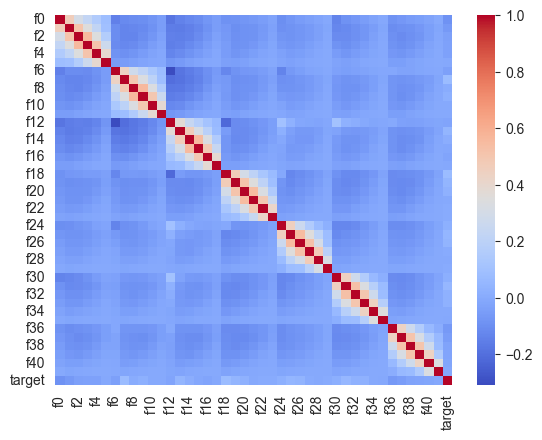

target    1.000000
f18       0.074426
f7        0.070938
f31       0.054176
f25       0.045310
f13       0.042819
f19       0.042409
f26       0.038319
f20       0.028279
f33       0.027202
f32       0.026104
f24       0.024502
f9        0.021572
f30       0.015781
f14       0.012039
f8        0.006194
f27       0.002367
f29       0.000399
f22      -0.000081
f23      -0.000288
f10      -0.001704
f28      -0.002536
f34      -0.003035
f21      -0.003561
f11      -0.005711
f35      -0.008417
f17      -0.009548
f5       -0.010190
f41      -0.010464
f15      -0.012029
f40      -0.020028
f16      -0.021968
f12      -0.022053
f39      -0.022334
f38      -0.028690
f3       -0.035043
f4       -0.035689
f6       -0.037590
f2       -0.039243
f37      -0.047933
f36      -0.063196
f1       -0.063723
f0       -0.089957
Name: target, dtype: float64


In [10]:
# check correlation between features
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

# check correlation between features and target
corr_matrix = train.corr()
print(corr_matrix['target'].sort_values(ascending=False))

# scaling features
scalar = StandardScaler()

# fit and transform scalar to train set
X_train_scaled = scalar.fit_transform(X_train)

# transform test set
X_test_scaled = scalar.transform(X_test)

# transform test set
X_dev_scaled = scalar.transform(X_dev)




# highly correlated features with each other => remove one of them
# highly correlated features with target => keep them


In [11]:
# initialize the models
# models = [('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('KNN', KNeighborsClassifier()), ('SVM', SVC()), ('RF', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('AdaBoost', AdaBoostClassifier()), ('GradientBoosting', GradientBoostingClassifier()), ('XGBoost', XGBClassifier())]


In [12]:

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
target_name = ['LABEL = 0', 'LABEL = 1', 'LABEL = 2']
accuracy_and_hyperparameters = []

def acc_from_classification_report(cls_rep):
    """
    :param cls_rep: classification report
    :return: accuracy from the classification report
    """
    acc = float(cls_rep.split('accuracy')[1].split()[0])
    return acc
    

# LogisticRegression
hyper_param = {'C': [0.1, 1, 10], 'max_iter': [100, 1000, 2500]}
combinations = list(itertools.product(*hyper_param.values()))
for comb in combinations:
    clf = LogisticRegression(C=comb[0], max_iter=comb[1]).fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_dev_scaled)
    name = f"LogisticRegression: penalty = C = {comb[0]}, max_iter = {comb[1]}"
    print(name)
    cls_rep = classification_report(y_dev, y_pred, target_names=target_name)
    print(cls_rep)
    # save the accuracy and hyperparameters from the classification report
    acc = acc_from_classification_report(cls_rep)
    accuracy_and_hyperparameters.append([name, acc, clf])


# Naive Bayes
clf = GaussianNB().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
print("Naive Bayes")
cls_rep = classification_report(y_dev, y_pred, target_names=target_name)
print(cls_rep)
acc = acc_from_classification_report(cls_rep)
accuracy_and_hyperparameters.append(["Naive Bayes", acc, clf])


# KNN
hyper_param = {'n_neighbors': [3, 5, 7]}
combinations = list(itertools.product(*hyper_param.values()))
for comb in combinations:
    clf = KNeighborsClassifier(n_neighbors=comb[0]).fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_dev_scaled)
    name = f"KNN: n_neighbors = {comb[0]}"
    print(name)
    cls_rep = classification_report(y_dev, y_pred, target_names=target_name)
    print(cls_rep)
    acc = acc_from_classification_report(cls_rep)
    accuracy_and_hyperparameters.append([name, acc, clf])


# # SVM
# hyper_param = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# clf = SVC().fit(X_train_scaled, y_train)
# y_pred = clf.predict(X_dev_scaled)

# RF
hyper_param = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7]}
combinations = list(itertools.product(*hyper_param.values()))
for comb in combinations:
    clf = RandomForestClassifier(n_estimators=comb[0], max_depth=comb[1]).fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_dev_scaled)
    name = f"RandomForest: n_estimators = {comb[0]}, max_depth = {comb[1]}"
    print(name)
    cls_rep = classification_report(y_dev, y_pred, target_names=target_name)
    print(cls_rep)
    acc = acc_from_classification_report(cls_rep)
    accuracy_and_hyperparameters.append([name, acc, clf])

# Decision Tree
hyper_param = {'max_depth': [3, 5, 7]}
combinations = list(itertools.product(*hyper_param.values()))
for comb in combinations:
    clf = DecisionTreeClassifier(max_depth=comb[0]).fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_dev_scaled)
    name = f"DecisionTree: max_depth = {comb[0]}"
    print(name)
    cls_rep = classification_report(y_dev, y_pred, target_names=target_name)
    print(cls_rep)
    acc = acc_from_classification_report(cls_rep)
    accuracy_and_hyperparameters.append([name, acc, clf])


# AdaBoost
hyper_param = {'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 1, 10]}
combinations = list(itertools.product(*hyper_param.values()))
for comb in combinations:
    clf = AdaBoostClassifier(n_estimators=comb[0], learning_rate=comb[1]).fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_dev_scaled)
    name = f"AdaBoost: n_estimators = {comb[0]}, learning_rate = {comb[1]}"
    print(name)
    cls_rep = classification_report(y_dev, y_pred, target_names=target_name)
    print(cls_rep)
    acc = acc_from_classification_report(cls_rep)
    accuracy_and_hyperparameters.append([name, acc, clf])


# GradientBoosting
hyper_param = {'n_estimators': [100, 200, 500], 'learning_rate': [0.05, 0.1, 0.5], 'max_depth': [3, 5, 7]}
combinations = list(itertools.product(*hyper_param.values()))
for comb in combinations:
    clf = GradientBoostingClassifier(n_estimators=comb[0], learning_rate=comb[1], max_depth=comb[2]).fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_dev_scaled)
    name = f"GradientBoosting: n_estimators = {comb[0]}, learning_rate = {comb[1]}, max_depth = {comb[2]}"
    print(name)
    cls_rep = classification_report(y_dev, y_pred, target_names=target_name)
    print(cls_rep)
    acc = acc_from_classification_report(cls_rep)
    accuracy_and_hyperparameters.append([name, acc, clf])


# XGBoost
hyper_param = {'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 1, 10], 'max_depth': [3, 5, 7]}
combinations = list(itertools.product(*hyper_param.values()))
for comb in combinations:
    clf = XGBClassifier(n_estimators=comb[0], learning_rate=comb[1], max_depth=comb[2]).fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_dev_scaled)
    name = f"XGBoost: n_estimators = {comb[0]}, learning_rate = {comb[1]}, max_depth = {comb[2]}"
    print(name)
    cls_rep = classification_report(y_dev, y_pred, target_names=target_name)
    print(cls_rep)
    acc = acc_from_classification_report(cls_rep)
    accuracy_and_hyperparameters.append([name, acc, clf])
    

# print the best accuracy and hyperparameters from all the models
best_acc = max(accuracy_and_hyperparameters, key=lambda x: x[1])
best_name = best_acc[0]


print(f"the accuracy of the best model which is {best_name} on the test set is: {best_acc[-1].score(X_test_scaled, y_test)}, with accuracy as the metric")



LogisticRegression: penalty = C = 0.1, max_iter = 100
              precision    recall  f1-score   support

   LABEL = 0       0.00      0.00      0.00      1270
   LABEL = 1       0.57      0.03      0.06      3373
   LABEL = 2       0.66      0.99      0.79      8869

    accuracy                           0.66     13512
   macro avg       0.41      0.34      0.28     13512
weighted avg       0.58      0.66      0.54     13512

LogisticRegression: penalty = C = 0.1, max_iter = 1000
              precision    recall  f1-score   support

   LABEL = 0       0.00      0.00      0.00      1270
   LABEL = 1       0.57      0.03      0.06      3373
   LABEL = 2       0.66      0.99      0.79      8869

    accuracy                           0.66     13512
   macro avg       0.41      0.34      0.28     13512
weighted avg       0.58      0.66      0.54     13512

LogisticRegression: penalty = C = 0.1, max_iter = 2500
              precision    recall  f1-score   support

   LABEL = 0       

Explanation of the chosen model:
We chose the best model due to the accuracy metric from the classification report.
We chose this metric because we wanted to predict with generic metric.

In all the models we chose the hyperparameters that include the default values.

In XGBoost we chose those hyperparameters because we wanted not to overfit the model, and we wanted to get the best accuracy, so we limited the number of estimators and the max depth of the tree.

As we can see from the classification reports, the worst model on the dev set was the Naive Bayes model, and the best model was the XGBoost model.

In addition, we can see the following:
XGBoost: n_estimators = 500, learning_rate = 10, max_depth = 3: 0.12 accuracy on the dev set
XGBoost: n_estimators = 200, learning_rate = 10, max_depth = 3: 0.12 accuracy on the dev set
XGBoost: n_estimators = 100, learning_rate = 10, max_depth = 3: 0.12 accuracy on the dev set
So we can see that the number of estimators doesn't affect the accuracy of the model when the learning rate is 10 and the max depth is 3.
This is happening because the learning rate is too high, so the model is not learning from the data, and the max depth is too low, so the model is not learning from the data.

We can see the accuracy of the best model on the dev set is 0.85 and there are some that are close to it (or even equal), so maybe we could get better result with the others on the test set.

